In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy.stats import probplot,shapiro
import os

In [2]:
chain_lengths=[25,50,75,100,125,150]
folders=[]
for i in chain_lengths:
    folders.append('../chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    if j==0:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=chain_rg_ree.copy()
    else:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=running_df.append(chain_rg_ree.copy())
    j+=1  

#     epas_considered = chain_rg_ree.epas.unique()
#     blank_df = pd.DataFrame()
#     for epas in chain_rg_ree.epas.unique():
#         if epas in epas_considered:
#             frames_number=len(chain_rg_ree[chain_rg_ree.epas==epas].index)
#             equil_frames=int(0.90*frames_number)
#             temp_df = chain_rg_ree[chain_rg_ree.epas==epas].iloc[-equil_frames:,:]
#             blank_df = blank_df.append(temp_df)
#     equil_chain_rg_ree=blank_df.copy()



# set epas for notebook

In [3]:
chain_rg_ree=running_df[running_df.epas==0.5]

# continue

In [4]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [5]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [6]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

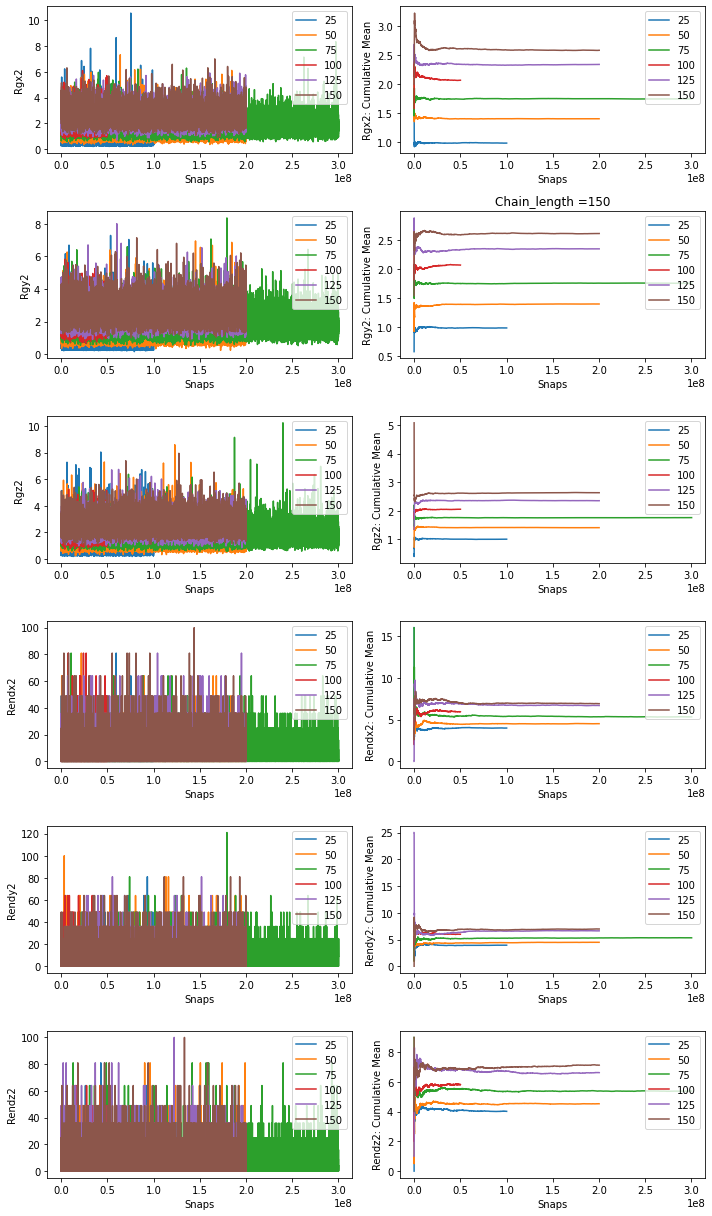

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))

for chain_length in chain_rg_ree.chain_length.unique():
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,label=str(chain_length))
    
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')

    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,label=str(chain_length))

    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()    
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()    
    ax[1,1].set_title('Chain_length ='+str(chain_length))

    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,label=str(chain_length))
 
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()    
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
   
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,label=str(chain_length))
 
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()    
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
 
    ax[3,1].legend()

    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,label=str(chain_length))
 
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()    
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
 
    ax[4,1].legend()

    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,label=str(chain_length))
 
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()    
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')

    ax[5,1].legend()    
plt.tight_layout()

In [7]:
chain_rg_ree

frames  epas  chain_length  econf       Rgx       Rgy       Rgz  \
70070      10000   0.5            25 -130.0  2.000000  0.582400  0.480000   
70071      20000   0.5            25 -272.0  1.273600  1.120000  0.310400   
70072      30000   0.5            25 -394.0  0.665600  1.097600  0.617600   
70073      40000   0.5            25 -534.0  1.942400  0.950400  0.249600   
70074      50000   0.5            25 -672.0  1.161600  0.537600  1.001600   
...          ...   ...           ...    ...       ...       ...       ...   
80075  200120000   0.5           150  117.0  2.711822  3.010000  1.915556   
80076  200140000   0.5           150  116.0  2.260622  2.783289  2.689289   
80077  200160000   0.5           150  128.0  1.789733  2.841822  3.557733   
80078  200180000   0.5           150  135.0  2.281822  3.902622  2.712222   
80079  200200000   0.5           150  120.0  1.918267  2.186489  3.475733   

       Rendx  Rendy  Rendz  Rend2       Rg2     ratio  asphericity  \
70070   16.0    4.0    0.0   20.0  3.062400  6.530825     1.468800   
70071    0.0    0.0    4.0    4.0  2.704000  1.479290     0.558400   
70072    1.0    1.0    4.0    6.0  2.380800  2.520161    -0.192000   
70073    4.0    1.0    1.0    6.0  3.142400  1.909369     1.342400   
70074    4.0    1.0    1.0    6.0  2.700800  2.221564     0.392000   
...      ...    ...    ...    ...       ...       ...          ...   
80075   16.0    0.0    1.0   17.0  7.637378  2.225895     0.249044   
80076    9.0    0.0   36.0   45.0  7.733200  5.819066    -0.475667   
80077    9.0    0.0    0.0    9.0  8.189289  1.098997    -1.410044   
80078   36.0    9.0    4.0   49.0  8.896667  5.507681    -1.025600   
80079    9.0    1.0    9.0   19.0  7.580489  2.506435    -0.912844   

       acylindricity       RSA  
70070       0.102400  0.480497  
70071       0.809600  0.331481  
70072       0.480000  0.192326  
70073       0.700800  0.468820  
70074      -0.464000  0.207853  
...              ...       ...  
80075       1.094444  0.128315  
80076       0.094000  0.062404  
80077      -0.715911  0.188091  
80078       1.190400  0.163452  
80079      -1.289244  0.190250  

[75060 rows x 16 columns]

In [8]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = chain_lengths
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.90*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

In [9]:
equil_chain_rg_ree

frames  epas  chain_length     econf       Rgx       Rgy       Rgz  \
71071   10020000   0.5            25 -157120.0  0.880000  0.598400  0.665600   
71072   10030000   0.5            25 -157254.0  0.640000  1.174400  0.678400   
71073   10040000   0.5            25 -157407.0  0.598400  3.158400  0.665600   
71074   10050000   0.5            25 -157525.0  2.169600  2.070400  1.465600   
71075   10060000   0.5            25 -157712.0  0.745600  0.640000  0.880000   
...          ...   ...           ...       ...       ...       ...       ...   
80075  200120000   0.5           150     117.0  2.711822  3.010000  1.915556   
80076  200140000   0.5           150     116.0  2.260622  2.783289  2.689289   
80077  200160000   0.5           150     128.0  1.789733  2.841822  3.557733   
80078  200180000   0.5           150     135.0  2.281822  3.902622  2.712222   
80079  200200000   0.5           150     120.0  1.918267  2.186489  3.475733   

       Rendx  Rendy  Rendz  Rend2       Rg2     ratio  asphericity  \
71071    1.0    1.0    0.0    2.0  2.144000  0.932836     0.248000   
71072    4.0    4.0    0.0    8.0  2.492800  3.209243    -0.286400   
71073    1.0   25.0    0.0   26.0  4.422400  5.879161    -1.313600   
71074    9.0    4.0    1.0   14.0  5.705600  2.453730     0.401600   
71075    4.0    4.0    0.0    8.0  2.265600  3.531073    -0.014400   
...      ...    ...    ...    ...       ...       ...          ...   
80075   16.0    0.0    1.0   17.0  7.637378  2.225895     0.249044   
80076    9.0    0.0   36.0   45.0  7.733200  5.819066    -0.475667   
80077    9.0    0.0    0.0    9.0  8.189289  1.098997    -1.410044   
80078   36.0    9.0    4.0   49.0  8.896667  5.507681    -1.025600   
80079    9.0    1.0    9.0   19.0  7.580489  2.506435    -0.912844   

       acylindricity       RSA  
71071      -0.067200  0.118814  
71072       0.496000  0.207105  
71073       2.492800  0.571425  
71074       0.604800  0.115678  
71075      -0.240000  0.091960  
...              ...       ...  
80075       1.094444  0.128315  
80076       0.094000  0.062404  
80077      -0.715911  0.188091  
80078       1.190400  0.163452  
80079      -1.289244  0.190250  

[67554 rows x 16 columns]

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


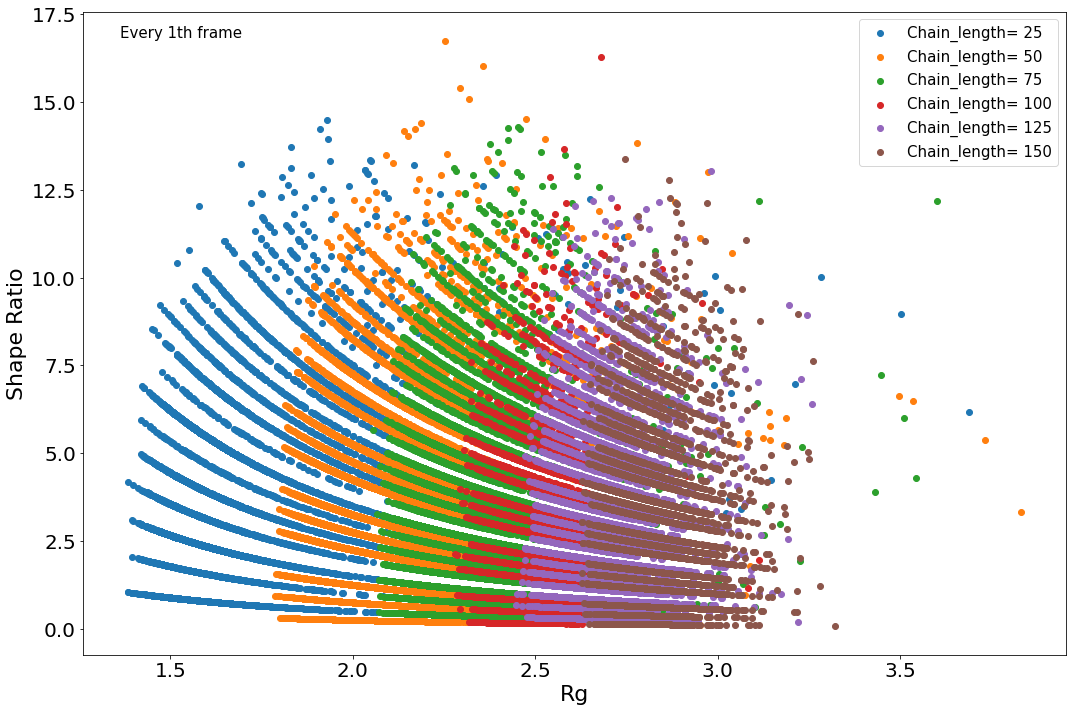

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


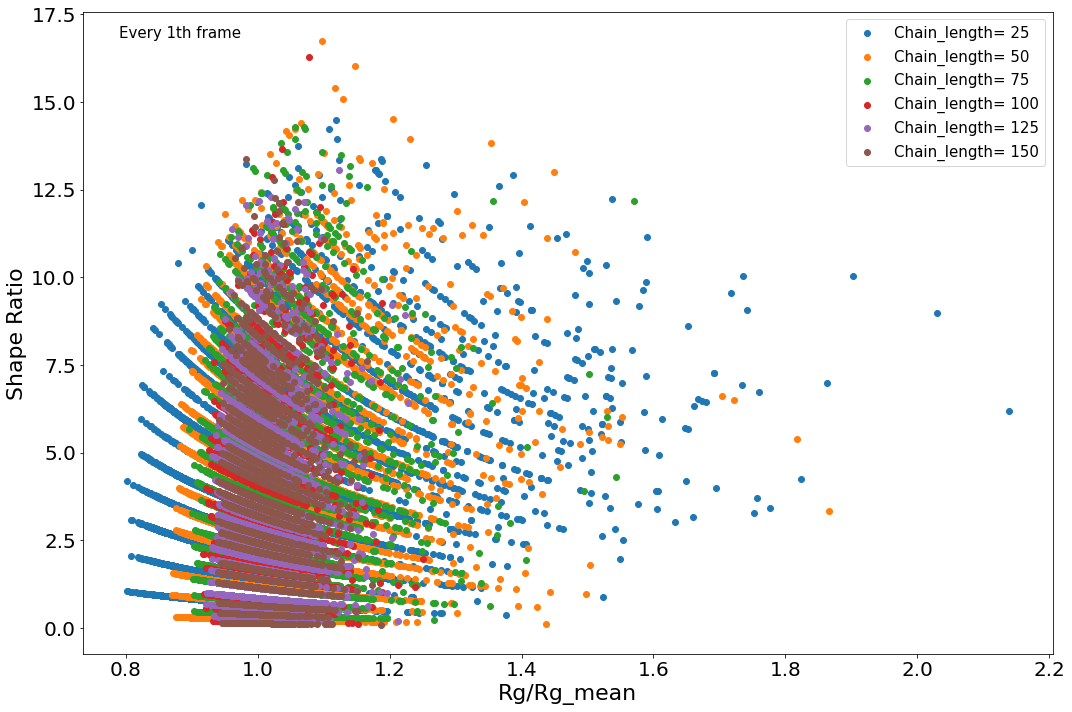

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


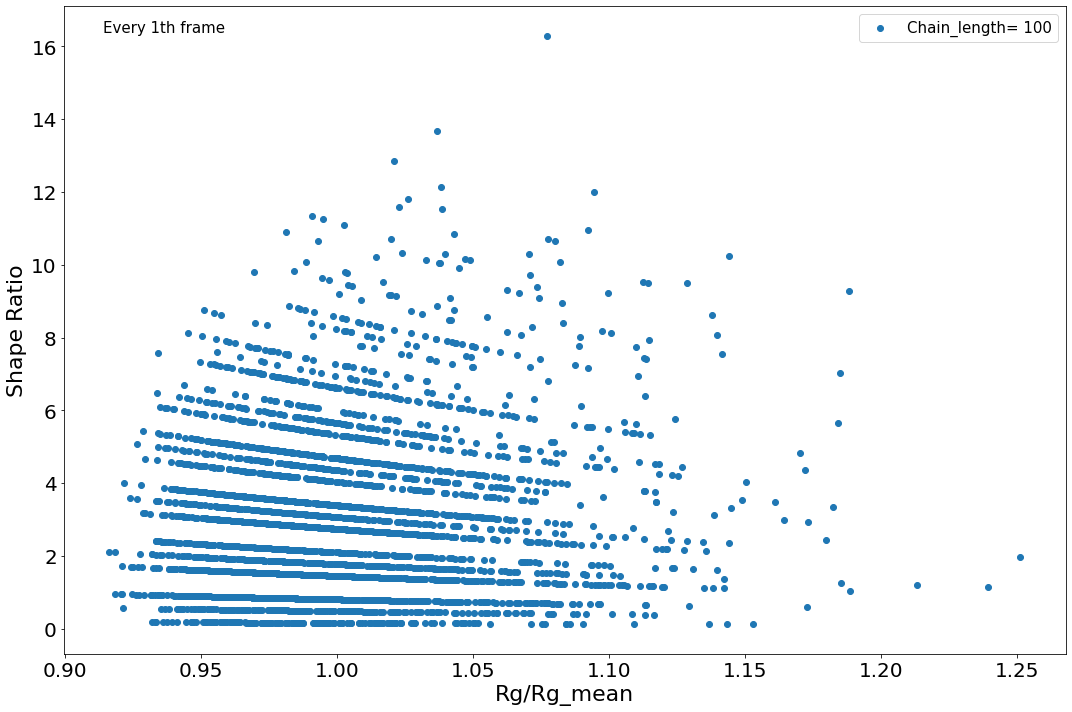

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    if i==100:
        ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
                   equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
                label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


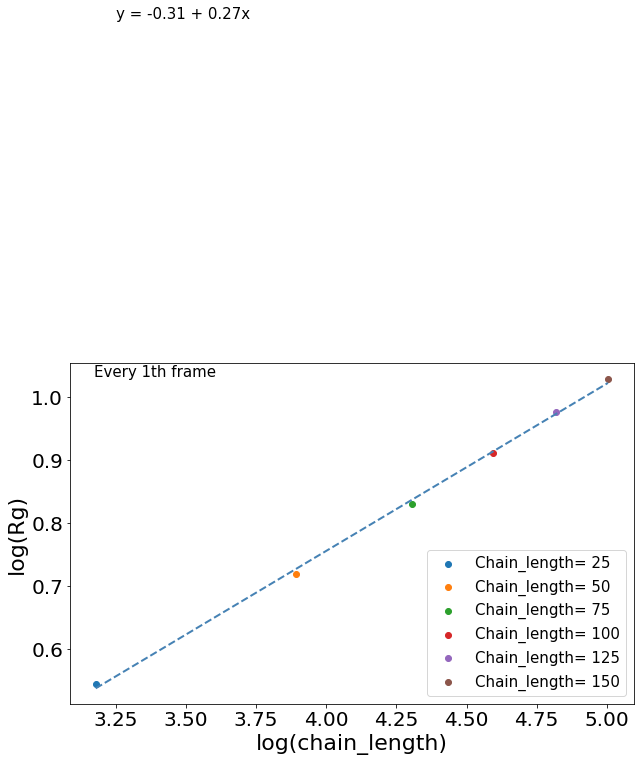

In [15]:
#use i-1 because there are i-1 bonds
fig,ax = plt.subplots(figsize=(9,25))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(np.log(i-1),np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5),
            label='Chain_length= '+str(i))
ax.legend(fontsize=15,loc='lower right')
ax.set_xlabel('log(chain_length)',fontsize=22)
ax.set_ylabel('log(Rg)',fontsize=22)
x=np.array([np.log(i-1) for i in equil_chain_rg_ree.chain_length.unique()])
y=np.array([np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5) for i in equil_chain_rg_ree.chain_length.unique()])
a, b = np.polyfit(x, y, 1)
ax.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
ax.text(0.15,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
ax.text(3.25, 1.6, 'y = ' + '{:.02f}'.format(b) + ' + {:.02f}'.format(a) + 'x', size=14,fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


In [16]:
equil_chain_rg_ree.ratio.mean

<bound method Series.mean of 71071    0.932836
71072    3.209243
71073    5.879161
71074    2.453730
71075    3.531073
           ...   
80075    2.225895
80076    5.819066
80077    1.098997
80078    5.507681
80079    2.506435
Name: ratio, Length: 67554, dtype: float64>

In [17]:
np.log(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==25].Rg2.values.mean())

1.0907667707043667

mean=  0.2792442865155382 for run =  25 std=  0.14003289341071085 error =  0.0014753388166549761
mean=  0.22096568294370714 for run =  50 std=  0.11395582503423612 error =  0.0008491643061486297
mean=  0.1922415721612308 for run =  75 std=  0.09947923228587062 error =  0.0007412891200151534
mean=  0.17220160887010946 for run =  100 std=  0.08820799499687317 error =  0.0013136141951024729
mean=  0.16226080935260745 for run =  125 std=  0.08506593573951023 error =  0.0008962256932268595
mean=  0.15235301413326377 for run =  150 std=  0.07980769793347167 error =  0.00084082669265277


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


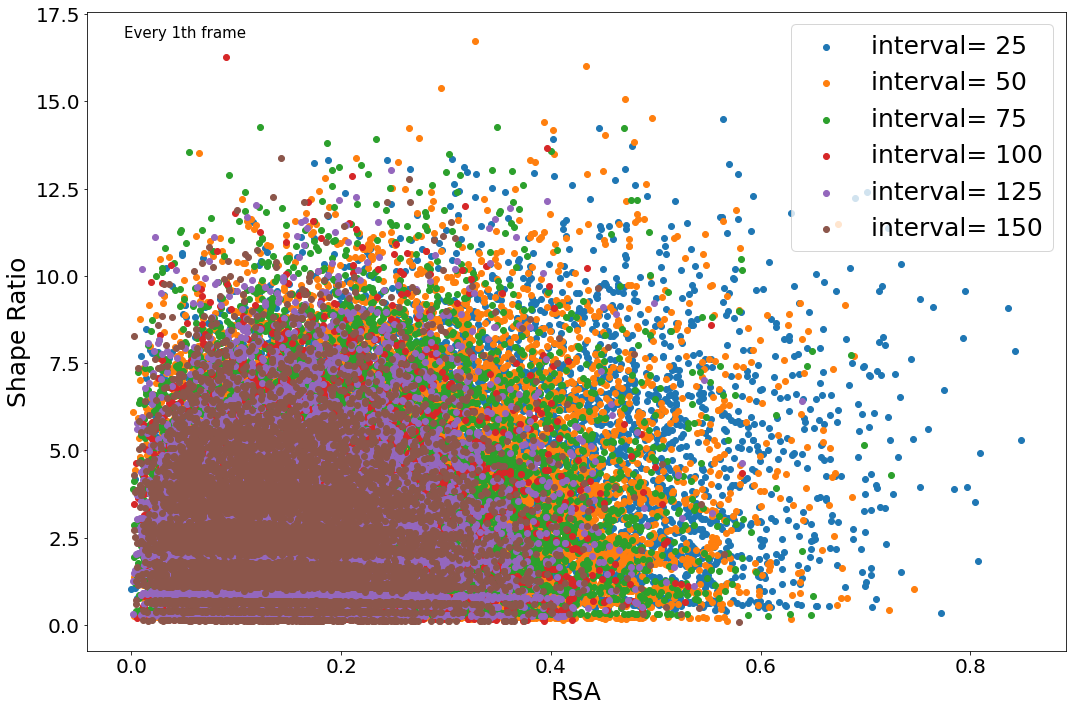

In [18]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


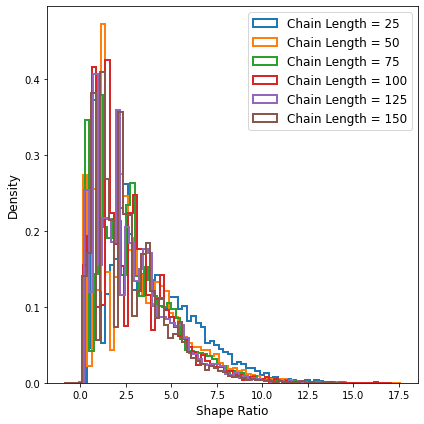

In [19]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.max()+1,0.25),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [20]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean shape ratio for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.std(),'0.2f'))
    

The mean shape ratio for chain length  25  is 3.81 with standard deviation  2.43
The mean shape ratio for chain length  50  is 3.14 with standard deviation  2.27
The mean shape ratio for chain length  75  is 3.01 with standard deviation  2.11
The mean shape ratio for chain length  100  is 2.86 with standard deviation  2.05
The mean shape ratio for chain length  125  is 2.83 with standard deviation  2.00
The mean shape ratio for chain length  150  is 2.68 with standard deviation  1.92


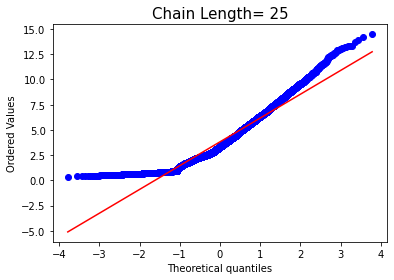

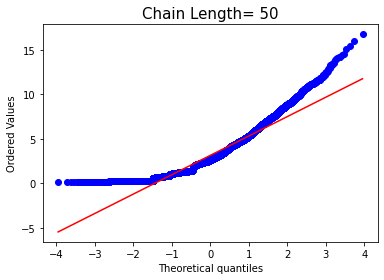

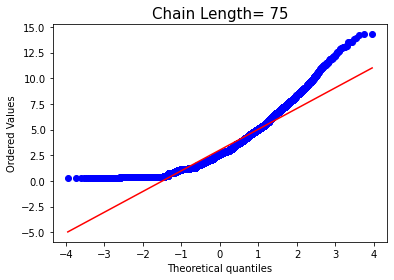

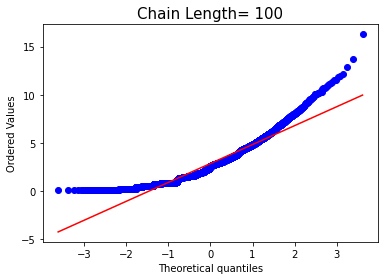

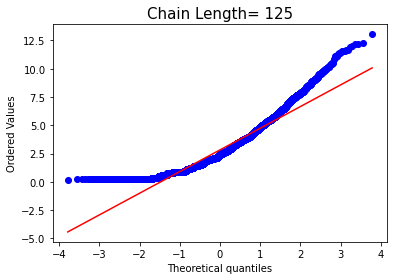

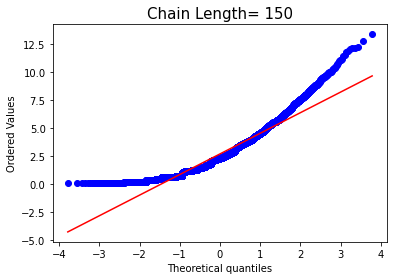

In [21]:
#Q-Q plot
#Shape Ratio
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

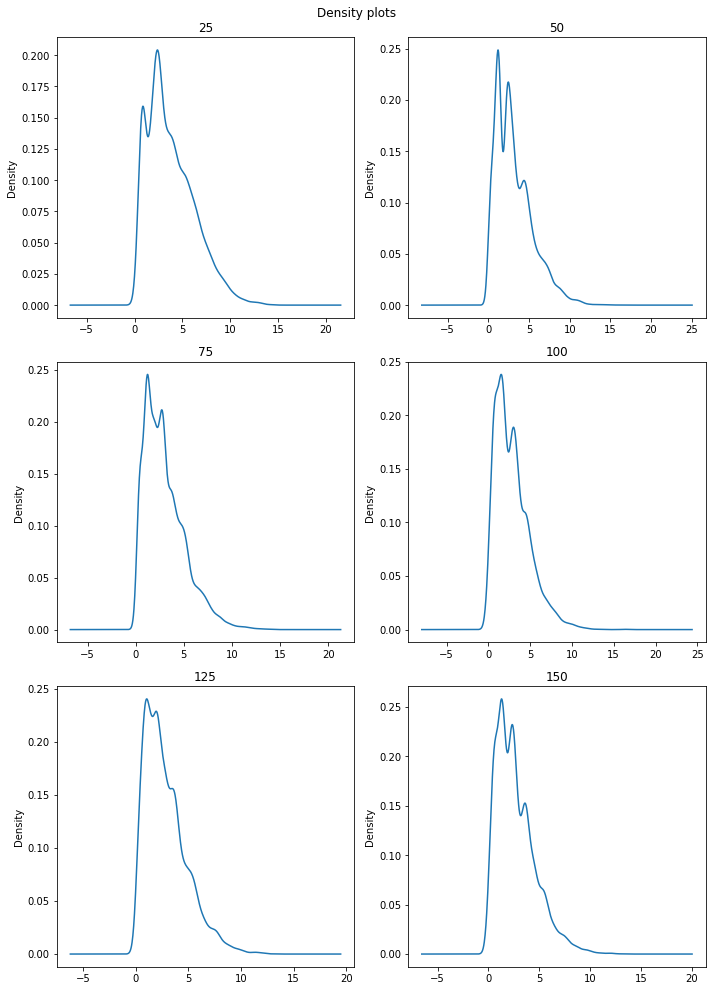

In [22]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].ratio.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

In [23]:
for i in equil_chain_rg_ree.chain_length.unique():
    print(f'{i}: {"Not Gaussian" if shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)[1]<0.05 else "Gaussian"}  {shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)}')


25: Not Gaussian  ShapiroResult(statistic=0.9387557506561279, pvalue=0.0)
50: Not Gaussian  ShapiroResult(statistic=0.9194412231445312, pvalue=0.0)
75: Not Gaussian  ShapiroResult(statistic=0.9155019521713257, pvalue=0.0)
100: Not Gaussian  ShapiroResult(statistic=0.9167307019233704, pvalue=2.1019476964872256e-44)
125: Not Gaussian  ShapiroResult(statistic=0.9188885688781738, pvalue=0.0)
150: Not Gaussian  ShapiroResult(statistic=0.9192203283309937, pvalue=0.0)


/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/

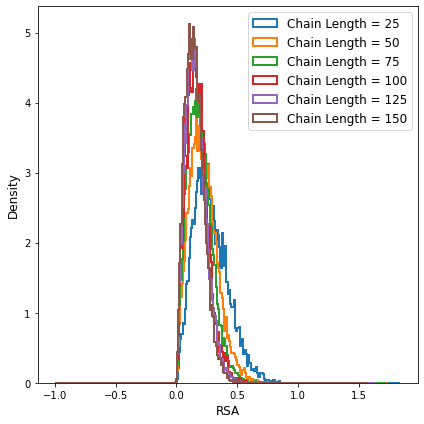

In [24]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.max()+1,0.01),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('RSA distribution',fontsize=25)
plt.xlabel("RSA",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [25]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean RSA for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.std(),'0.2f'))
    

The mean RSA for chain length  25  is 0.28 with standard deviation  0.14
The mean RSA for chain length  50  is 0.22 with standard deviation  0.11
The mean RSA for chain length  75  is 0.19 with standard deviation  0.10
The mean RSA for chain length  100  is 0.17 with standard deviation  0.09
The mean RSA for chain length  125  is 0.16 with standard deviation  0.09
The mean RSA for chain length  150  is 0.15 with standard deviation  0.08


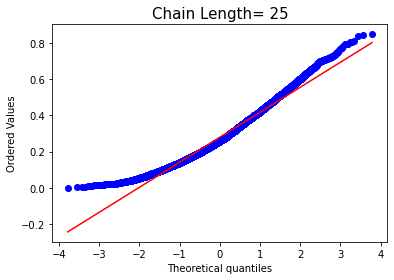

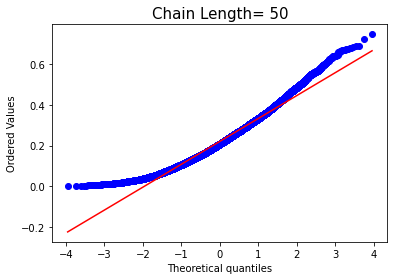

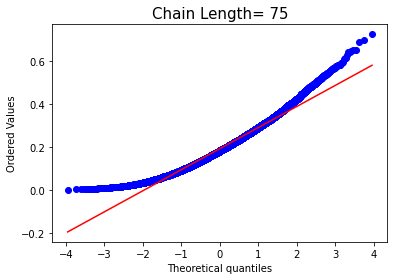

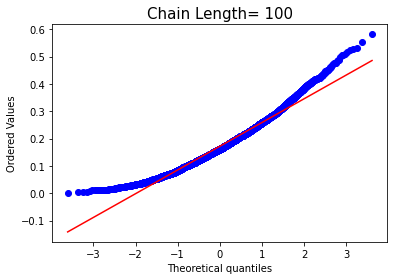

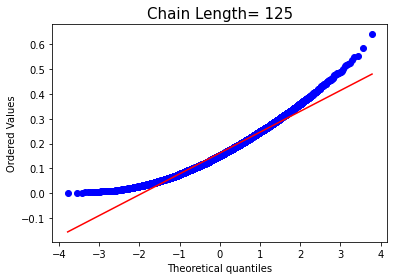

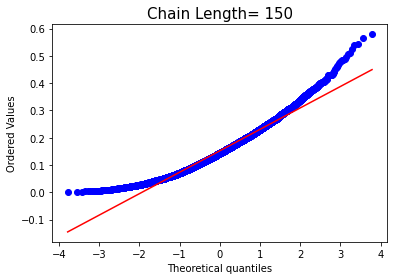

In [26]:
#Q-Q plot
#RSA
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].RSA,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

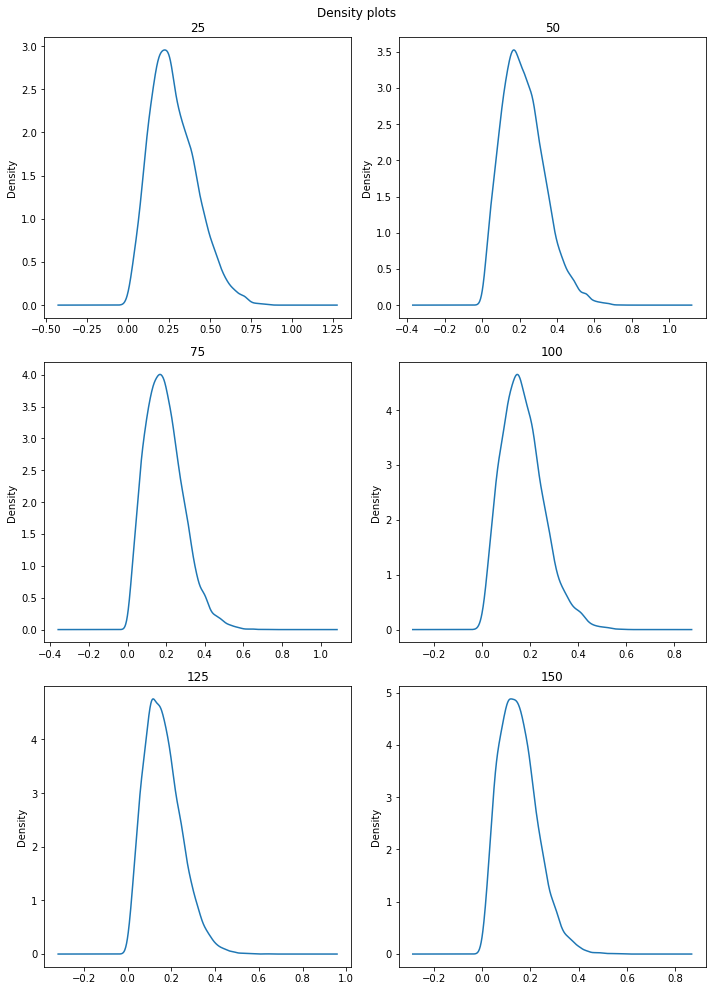

In [27]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].RSA.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

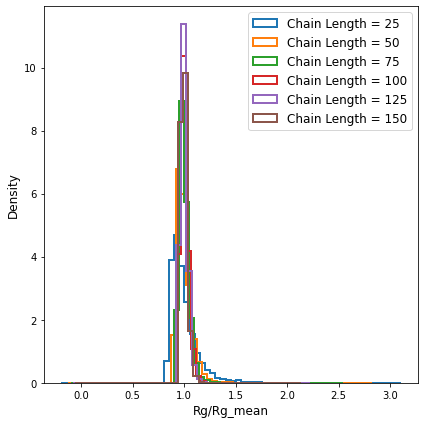

In [28]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,linewidth=2,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).min()-1,
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).max()+1,0.05))
    
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg/Rg_mean",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]


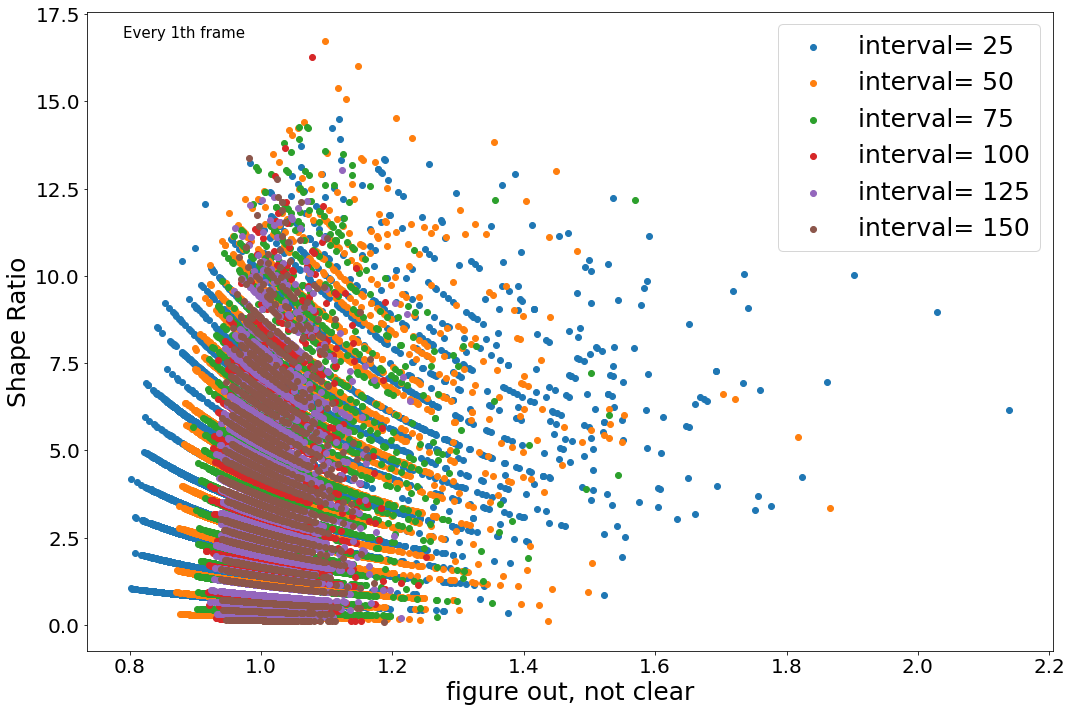

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
#    print('mean Rg/Rg_mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.std())**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('figure out, not clear',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


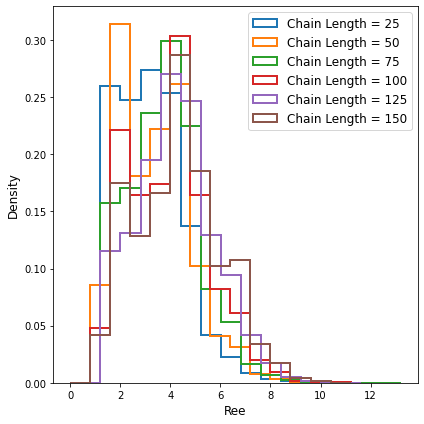

In [30]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


# dont look beyond this line

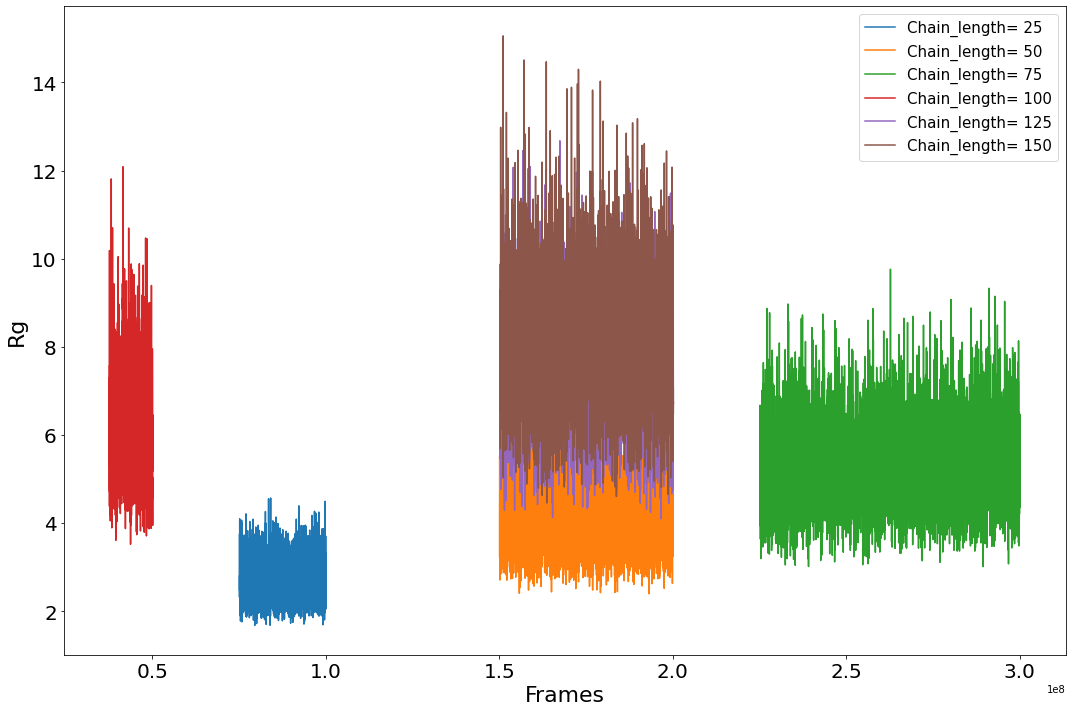

In [90]:
fig,ax = plt.subplots(figsize=(15,10))
for i in equil_chain_rg_ree.chain_length.unique():
    ax.plot(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames.values,(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values)**0.5,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rg',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

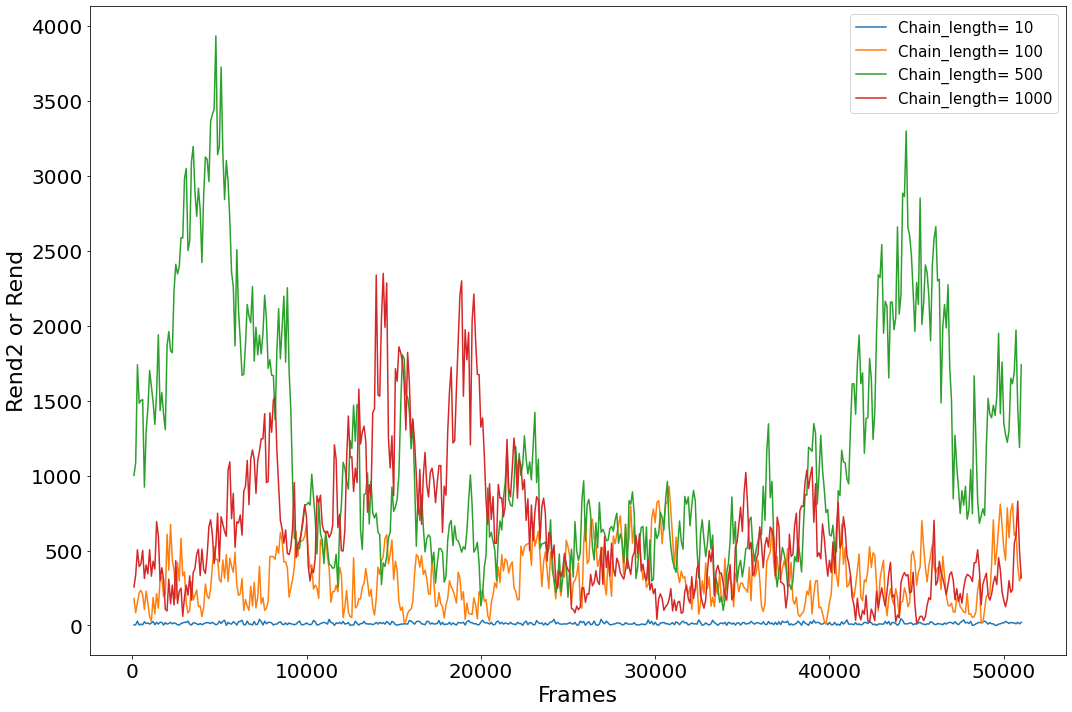

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

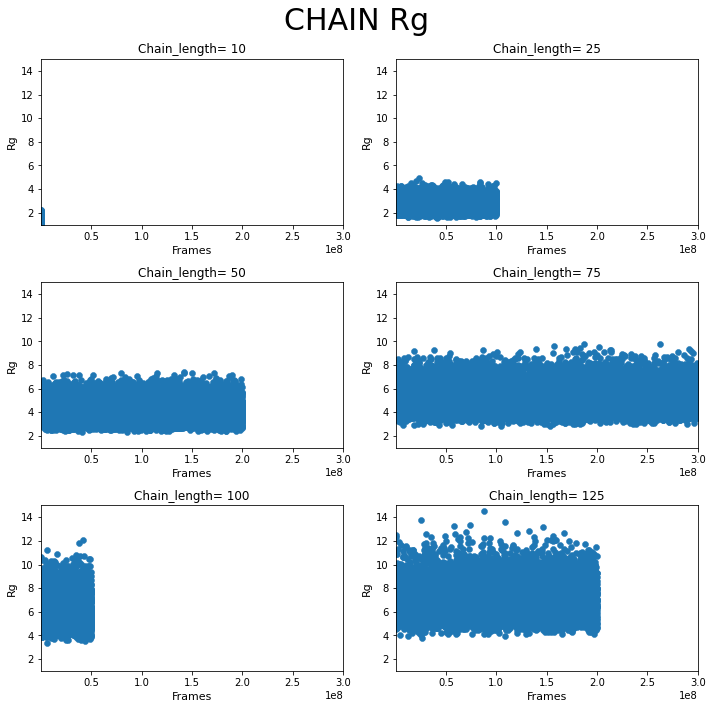

In [94]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         (chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values)**0.5,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('Chain_length= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()),int(chain_rg_ree.frames.values.max()))
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()**0.5),int(chain_rg_ree.Rg2.values.max()**0.5))
        counter+=1
fig.suptitle('CHAIN Rg',fontsize=30)
plt.tight_layout()


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


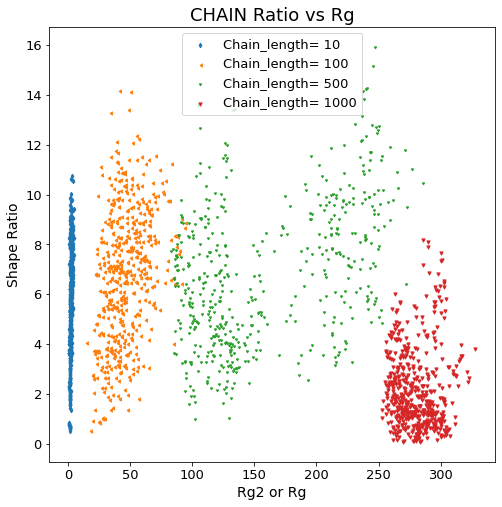

In [21]:
#IGNORE
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,ax = plt.subplots(figsize=(8,8))
temp_chain= chain_rg_ree.copy()
scatter_markers=['d',4,'1','v']
j=0
for chain_length in temp_chain.chain_length.unique():
    ax.scatter(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
               chain_rg_ree[chain_rg_ree.chain_length==chain_length].ratio.values,
               marker=scatter_markers[j],s=10,alpha=1,
                                      label='Chain_length= '+str(chain_length))
    j+=1
ax.set_xlabel('Rg2 or Rg',fontsize=14)
ax.set_ylabel('Shape Ratio',fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.setp(ax.get_xticklabels(), fontsize=13)
ax.legend(fontsize=13)
ax.set_title('CHAIN Ratio vs Rg',fontsize=18) #Ratio vs Rg
del temp_chain